<a href="https://colab.research.google.com/github/tether007/Pytorch/blob/main/pytorch02_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pytorch workflow

* Lets see an Example from pytorch E-2-E workflow
notebook->https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb



In [ ]:
what_were_covering={
    1: 'data(prepare and load)',
    2: 'build model',
    3: 'fitting the model(training)',
    4: 'making predictions(inference)',
    5: 'saving and loading a model',
    6: 'putting all together',
}
what_were_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model(training)',
 4: 'making predictions(inference)',
 5: 'saving and loading a model',
 6: 'putting all together'}

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

 ## Data (preparing and loading)
 * Excel csv
 * images
 * videos
 * DNA
 * text

 ML is a game of two parts:
 1. getting a data into numberical representaion
 2. build a model a learn patterns from the numbers and predict a value

 to showcase this,lets create some **known** data using a linear regressin formula

 we'll use a LR formula to make a straight line with known parameters.


In [ ]:
#create known parameters

weight = 0.7
bias=0.3

#create
start =0
end=1
step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias


X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X),len(y)

(50, 50)

### Splitting data into training and testing sets(Most Important concept in ML)


In [ ]:
#create a train/test set
training_split=int(.8*len(X))#we train 80% of dataset to model
X_train,y_train=X[:training_split],y[:training_split]
X_test,y_test=X[training_split:],y[training_split:]#other 20% of the model is the test split: A test set allows you to measure how well your model generalizes to new, unseen data.

len(X_train),len(y_train),len(X_test),len(y_test) #labels,features

(40, 40, 10, 10)

how can we visualize our data?




In [ ]:
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="training data")

  #plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="testing data")

  #Are there predictions?
  if predictions is not None:
    plt.scatter(test_data,predictions,c='r',s=4,label='predictions')

  plt.legend(prop={'size':14})


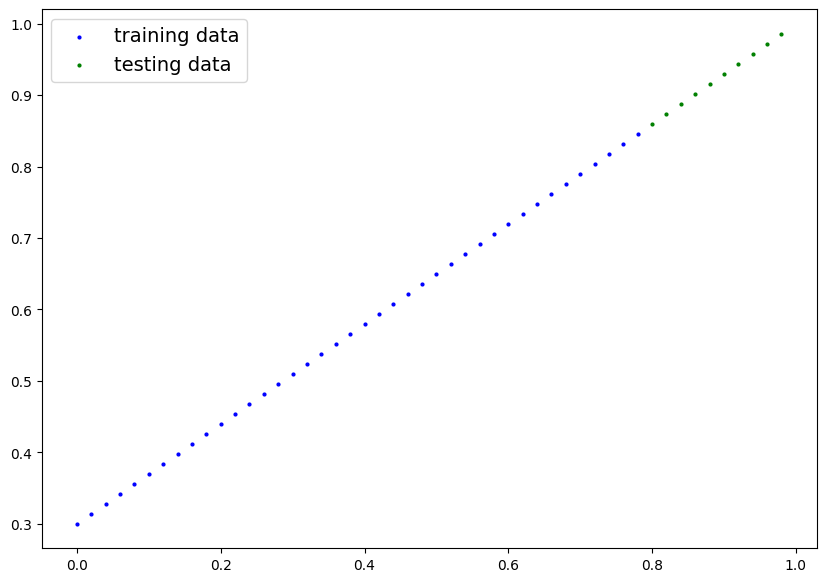

In [ ]:
plot_predictions()

## 2. Building our first pytorch model

My first pytorch model

What model does?
* Start with Random values(weight and Bias)
* Look at training data amd adjust the random values to better represent the ideal values(the weight and bias values which we used in the data)

How does it do?
* from two algos:
  1. Gradient descent : https://youtu.be/IHZwWFHWa-w?si=kIWj-jCL_cyxcqFo
  2. Backpropagation : https://youtu.be/Ilg3gGewQ5U?si=XlzNTf4wmvQdtvhl

In [ ]:
class LinearRegressionModel(nn.Module):#>> everything inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))


    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) # Fixed typo here

  def forward(self,x: torch.Tensor)->torch.Tensor: # Corrected indentation and definition
    return self.weights*x+self.bias

### PyTorch Essentials
* torch.nn - contains all of the buildings for computational graphs( a nn can be considered as a compututaional graph)
* torch.nn.parameter - what parameters should our model try and learn , often a pytorch layer from torch.nn will set it for us
* torch.nn.Module - the base class for all Neural network modules,if subclassed, I should override forward()-->what task should be iterated
* torch,optim - this is where optimizers in pyTorch live,they will help with gradient descent.
* def forward()- all nn.Module subclasses are required to override to tell what actually happens

### Checking the contents of our pyTorch Model

to see what is inside in the model lets do .parameter

In [ ]:
#create a random seed
torch.manual_seed(42)
#create an instance (object):
model_0=LinearRegressionModel()
#lets check what are parameters are
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# list named parameters
model_0.state_dict()#-->dictionary of our input parameters

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight,bias


(0.7, 0.3)

## Making predictions using torch.inference_mode()
to check our model's predictive  power ,we see how well the model predicts our y_test based on X_test

In [ ]:
X_test
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

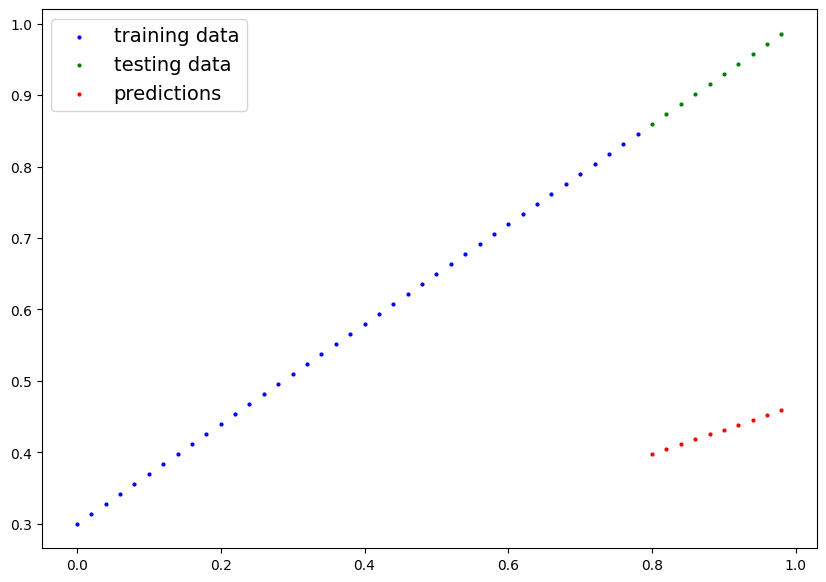

In [ ]:
plot_predictions(predictions=y_preds)

## Train model

 The model should be trained to move the random tensor to unknown parameter to known parameters

 from poor representaion to better representation

**TO measure how wrong our model is we need to use loss Function or cost function or criteria**

**LOSS FUCTION**:A fuction that measures how wrong is the function from the actual known parameters

**OPTIMIZER**:Takes into account the loss of model and adjusts the model's parameters(e.g. weigth & bias) to improve the loss function .

in pytorch we need:
 * a training loop
 * a testing loop

      **in optimzer;**
      1. params-->the model parameter we want to optimise
      2. lr(learning rate)-->the lr is a hyperparameter defines how big/small the optim changes the parameters(lr proportional to change)

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# our parameters of model _--> the value that the model sets itself
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
from torch import nn
# Setup a loss function
loss_fn=nn.L1Loss()
loss_fn
# Setting up an optimizer(Stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)#lr-->learning right


### Building a training loop (And a testing loop) in pyTorch

In training loop:
0. Loop through data
1. forward pass(involves data moving through our model's 'forward()' fuctions)to make predictions on data -->called forward propagation
2. Calculate the loss(compare forward pass predictions to ground truth labels)
3. optimizer zero grad
4. loss backward - move backwardss throgh the network to calculate the gradients of each of parameters of loss(**backpropagation**)
5. optimizer step - use the optimzer to adjust our model's parameters to try and improve the loss(**gradient descent**)


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
torch.manual_seed(42)
# an epoch is one loop through data(hyperparameter-->set by the coder)
epochs = 100

#to track
epoch_count=[]
loss_vals=[]
test_loss_vals=[]

### Training
# step - 0 -->loop throgh dara
for epoch in range(epochs):
  # setting the model to training mode
  model_0.train()#-->sets all parameters that require gradient to require gradient
  model_0.eval()

  #1. forward pass
  y_pred=model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred,y_train)#(input,target)
  print(f'Loss{loss}')
  #3. optimiser zero grad
  optimizer.zero_grad()

  #4. perform backpropagation on the loss wrt to parameter of the model
  loss.backward()#Any default how the optimzier cahnges will accumulate through the loop.. so we have to zero everytimr

  #. step the optimizier (perform gradient descent)
  optimizer.step()


  ###Testing
  model_0.eval()# turns off the diff settings which arent neccesarry for evaluation(drop/batchnorm layers)
  with torch.inference_mode():
    #1. do forward pass
    test_pred=model_0(X_test)

    #2. Calculate the loss
    test_loss=loss_fn(test_pred,y_test)

  #3. Print whts happening:
  if epoch%10==0:
    epoch_count.append(epoch)
    loss_vals.append(loss)
    test_loss_vals.append(test_loss)
    print(f"epoch:{epoch}| loss:{loss} | Test Loss: {test_loss}")

    print(model_0.state_dict())
    print()

Loss0.31288138031959534
epoch:0| loss:0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

Loss0.3013603389263153
Loss0.28983935713768005
Loss0.2783183455467224
Loss0.26679736375808716
Loss0.2552763521671295
Loss0.24375534057617188
Loss0.23223432898521423
Loss0.22071333229541779
Loss0.20919232070446014
Loss0.1976713240146637
epoch:10| loss:0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])

Loss0.18615034222602844
Loss0.1746293306350708
Loss0.16310831904411316
Loss0.1515873372554779
Loss0.14006635546684265
Loss0.1285453587770462
Loss0.11702437698841095
Loss0.1060912236571312
Loss0.09681284427642822
Loss0.08908725529909134
epoch:20| loss:0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])

Loss0.08227583020925522
Loss0.07638873159885406
Loss0.07160007208585739
Loss0.067

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
# to plot the loss curve we convert our tensor (loss_vals,Test_loss_vals) into arrays by numpy
import numpy as np
loss_arr=np.array(torch.tensor(loss_vals).numpy())
test_loss_vals,loss_arr
# test_loss_arr=np.array(torch.tensor(test_loss_vals).numpy())


([tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647)],
 array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ],
       dtype=float32))

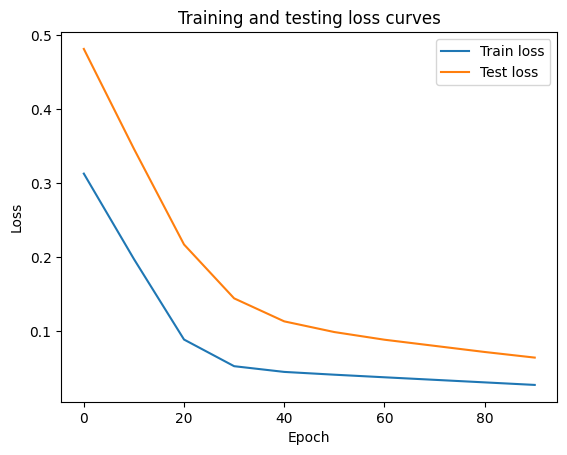

In [ ]:
#Plot loss curve

plt.plot(epoch_count,np.array(torch.tensor(loss_vals).numpy()),label="Train loss")
plt.plot(epoch_count,test_loss_vals,label="Test loss")
plt.title("Training and testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend();

In [ ]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)#doin predictions

In [ ]:
weight,bias


(0.7, 0.3)

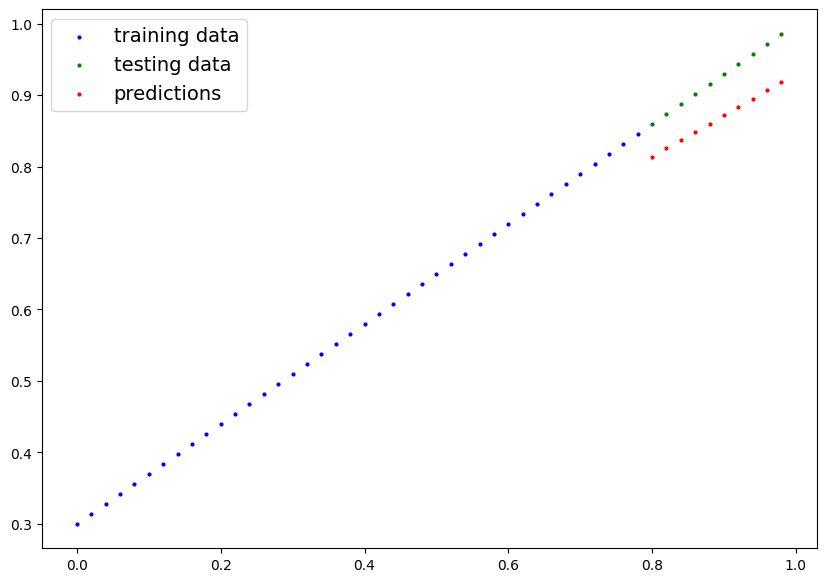

In [ ]:
plot_predictions(predictions=y_preds_new)

## Saving the model in Pytorch

saving loading models in pytorch has 3 imp methods
the model is like a class now each object might predict different scenarios
so we save and load diferent instances of our model
1. torch.save()-->saves a pytorch object in python's Pickle format
2. torch.load()-->it deserialises by unpickling the object
3. torch.nn.module.load_state_dict()-->loads our model's saved module ie that state_dict



In [ ]:
#saving our pytorch model
from pathlib import Path

#1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)#==>create a directory just for our model

#2.Create model's path
MODEL_NAME="Pytorch_Workflow_model_0_path.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#3. save and load model's state_dict
print(f'Saving model to:{MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to:models/Pytorch_Workflow_model_0_path.pth


##Loading a pytorch Model


In [ ]:
#New instance of the class LRM
loaded_model_0=LinearRegressionModel()

#Load the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<ipython-input-87-797d07fbd568>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
#making preds with the loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [ ]:
#make some preds
model_0.eval
with torch.inference_mode():
  model_0_preds=model_0(X_test)
model_0_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [ ]:
model_0_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##6.Putting all together

all in one


In [ ]:
#import pytorch and other essentials
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Creating device agnostic code

we can access gpu if available
else:CPU

In [ ]:
#DAC
device="cuda" if torch.cuda.is_available() else "cpu"
print(f'device being used:{device}')


device being used:cuda





###DATA
* we collect data and covert them into tensors
* then split 80%data to train and 20% to test

In [ ]:
#create data using linear reg formula:y=a+bX
#now here our x is independent & weight is b and a is bias
#Let us imagine predicting the weight when height is given
height=0.25
bias=45.2

#giving our values of heights

X=torch.arange(145,215).unsqueeze(dim=1)

y=height*X+bias
  #-->now its ready the LR
X[:10],y[:10]

(tensor([[145],
         [146],
         [147],
         [148],
         [149],
         [150],
         [151],
         [152],
         [153],
         [154]]),
 tensor([[81.4500],
         [81.7000],
         [81.9500],
         [82.2000],
         [82.4500],
         [82.7000],
         [82.9500],
         [83.2000],
         [83.4500],
         [83.7000]]))

In [ ]:
len(X)
len(y)

70



###SPLITING

In [ ]:
training_split=int(len(X)*0.8)
X_train=X[:training_split]
y_train=y[:training_split]
X_test,y_test=X[training_split:],y[training_split:]

In [ ]:
len(X_train),len(y_train),len(X_test)

(56, 56, 14)

###VISUALIZE

In [ ]:
#we visualize our regression to have a look over our data

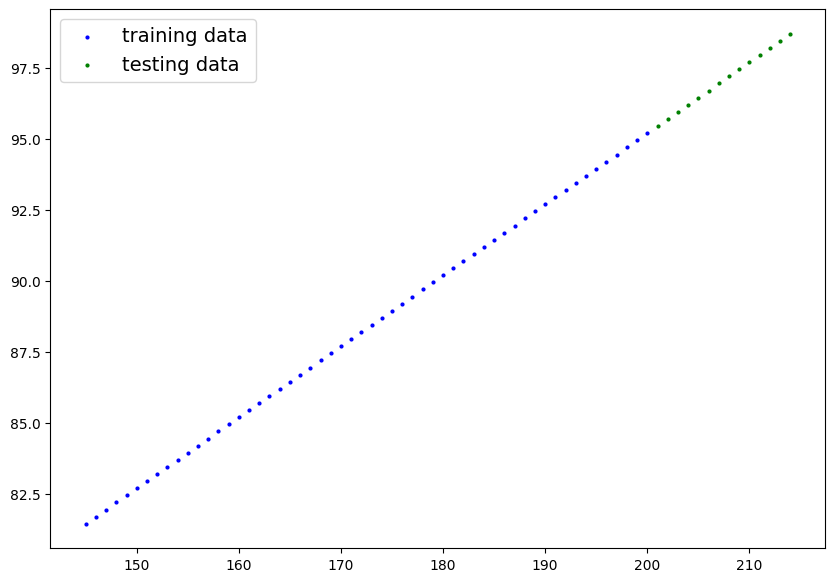

In [ ]:
plot_predictions(X_train,y_train,X_test,y_test);

###MODEL

Actually we can use inbuilt different layers for our purposes instead of writing on our own

In [ ]:
from torch import nn
class LinearRegressionModel(nn.Module):#>> everything inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))


    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) # Fixed typo here

  def forward(self,x: torch.Tensor)->torch.Tensor: # Corrected indentation and definition
    return self.weights*x+self.bias

In [ ]:
from torch import nn
#create a Linear modeule by inheriting nn.Modeule
class LinearRegressionModelv2(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.Linear() for creating the parameter automatically
    self.linear_layer = nn.Linear(in_features=1,out_features=1)#in_feature =1=out_feature this is cause the for every one value of X there is one value of y
  def forward(self,x: torch.tensor)->torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1=LinearRegressionModelv2()
model_1,model_1.state_dict()


(LinearRegressionModelv2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
#before training we can use the gpu if it is avilable
next(model_1.parameters()).device#next(model.parameters()): This returns the next parameter in the iterator, which is the first parameter in the model. Note that next() is used to get the first element of the iterator, not to iterate over all parameters.

device(type='cpu')

In [ ]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### TRAIN
The training loop must contain:
* Loss function
* Optimizer
* Training loop
* testing loop

In [ ]:
#setting up loss function
loss_fn=nn.L1Loss()
#setting up optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)



In [ ]:
#training loop()
torch.manual_seed(42)

epochs = 20

X_train=X_train.to(device)
X_test=X_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)


for epoch in range(epochs):
  model_1.train()
  #1.forward pass
  y_pred = model_1(X_train)
  #2. loss function
  loss = loss_fn(y_pred, y_train)
  #3. zero-grad the optimiser
  optimizer.zero_grad()
  #4.backpropagation
  loss.backward()
  #5.Optimiser step
  optimizer.step()

  ###Testing
  if epoch%10==0:
    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)
        print(f'epoch:{epoch}| loss:{loss} | Test Loss: {test_loss}')

RuntimeError: mat1 and mat2 must have the same dtype, but got Long and Float

In [ ]:
X_train.dtype,y_train.dtype,X_test.dtype,y_test.dtype


(torch.float32, torch.float32, torch.float32, torch.float32)

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

###AGAIN VIS

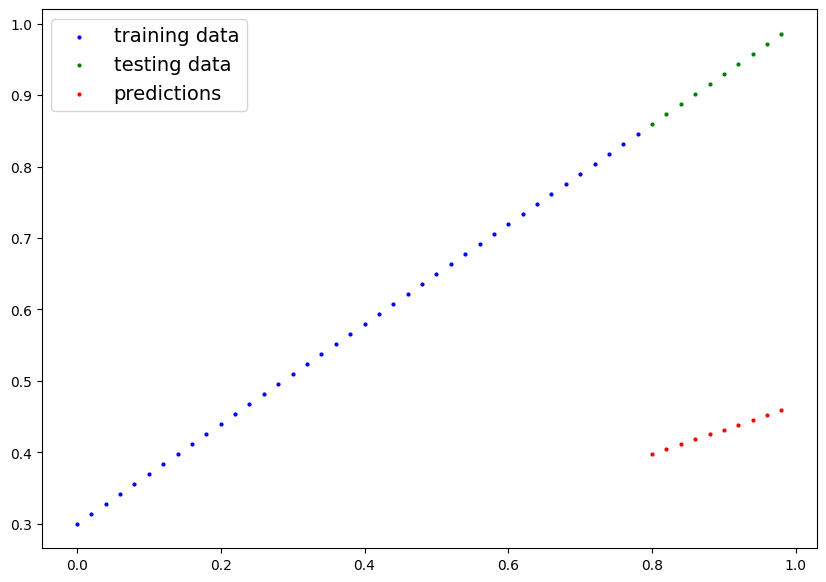

In [ ]:
plot_predictions(predictions=y_preds.cpu())